# FINAL PROJECT 1: LINEAR REGRESSION

<p style = "font-size: 35px"><b>UBER VS LYFT</b></p> 

## Introduction
</br>
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

### Our Members:
</br>
a. Nama: Minan Abdillah
</br>
   ID: PYTN-KS16-010
</br>
</br>
b. Michael Vincent Efren Malomo
</br>
ID: PYTN-KS16-016
</br>
</br>
c. Muhammad Danu Prasetia
</br>
ID: PYTN-KS16-020

## Abstract
</br>
Perkembangan teknologi saat ini mengalami kemajuan yang pesat, mengubah cara hidup masyarakat yang ada sebelumnya. Ini mempermudah berbagai aspek kehidupan, terutama dalam hal mobilitas perjalanan. Akses internet yang semakin meluas melalui perangkat smartphone telah mengakibatkan munculnya layanan transportasi online. Pada tahun 2018, New York mencatat pertumbuhan bisnis yang signifikan dan juga memimpin dalam skor global dalam sumber daya manusia. Ini mengindikasikan bahwa New York telah menjadi salah satu kota yang paling berpengaruh di dunia (Kearney, Laporan Kota Global 2018).

Di New York, Uber dan Lyft menjadi dua platform ride-hailing yang paling diminati. Secara umum, tidak ada perbedaan besar dalam hal biaya dan waktu antara moda transportasi ride-hailing dan taksi konvensional. Namun, keunggulan dari layanan ride-hailing terletak pada kenyamanannya. Calon penumpang tidak perlu menunggu di pinggir jalan; mereka dapat dengan mudah memesan pengemudi melalui aplikasi smartphone.

Demi membantu penduduk New York City memilih layanan transportasi online terbaik yang sesuai dengan berbagai pertimbangan, seperti cuaca, hari, dan jarak perjalanan, rencananya akan dikembangkan sebuah Aplikasi Prediksi Harga Transportasi Online (Uber dan Lyft) di New York City dengan menggunakan metode perbandingan Linear Regression dan Decision Tree.

## Dataset

<p style='text-align: justify;'>
    Dataset yang akan digunakan untuk dianalisis yaitu <b>Uber vs Lyft Dataset New York, USA</b> yang berisi pencatatan data perjalanan transportasi taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 kolom, tetapi yang paling relevan ada 10 kolom dari semuanya. Dari 57 kolom, data yang diperlukan untuk proyek ini antara lain: </p>

* Cab_type: Menyatakan Jenis/Merek transportasi online (Uber, Lyft).
* Name: Menyatakan Jenis/Kriteria mobil yang ada.
* Hour: Menyatakan di waktu/jam berapa taksi online dipesan (24 jam).
* Day: Menyatakan Tanggal berapa taksi online dipesan.
* Month: Menyatakan Bulan apa saja taksi online dipesan (bulan 11 dan 12).
* Source: Menyatakan Destinasi awal pengguna.
* Destination: Menyatakan tujuan akhir pengguna.
* Price: Menyatakan harga transportasi online (dalam dollar US).
* Distance: Menyatakan Jarak yang ditempuh (km).
* Short_summary: Menyatakan Cuaca ketika transportasi online dipesan.
* Temperature: Menytakan Suhu ketika transportasi online dipesan (Celcius).
* Visibility: Menyatakan Jarak penglihatan.
* Surge_multiplier: Kenaikan harga penawaran ketika terjadi lonjakan penumpang.



### Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:
* Mengetahui faktor-faktor yang berpengaruh dalam memprediksi tarif harga transportasi taksi online.
* Menemukan model terbaik dalam memprediksi tarif harga transportasi online.
* Memberikan insight yang dapat membantu pihak terkait.

## Import Libraries

In [182]:
import pandas as pd
import numpy as np

import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, confusion_matrix


%matplotlib inline

## Data Loading

### Import Dataset

In [77]:
## Membaca Dataset Uber VS. Lyft
df = pd.read_csv("../Dataset/rideshare_kaggle.csv")
## Menampilkan dataset tanpa memotong tampilan frame DataFrame pada kolomnya
pd.set_option("display.max.columns", None)

In [78]:
#Menampilkan 10 data teratas
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,4

In [79]:
#Menampilkan 10 data terbawah
df.tail(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693061,54362c72-124b-47e8-8d07-62a07cfff624,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,15.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693062,64a50889-d05b-49de-b416-1802db5c27ac,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,15.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693064,25ed29df-4f9c-4aac-8218-681427f1d738,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,West End,North End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,17.0,1.00,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,

### Jumlah Rows dan Columns

In [80]:
x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris pada dataset yang ada berjumlah: ', x, '\nJumlah Kolom pada dataset yang ada berjumlah: ', y)

Jumlah Baris pada dataset yang ada berjumlah:  693071 
Jumlah Kolom pada dataset yang ada berjumlah:  57


### Type of Dataset per Coloumns

In [81]:
## Menampilkan Info Mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Mengkalkulasikan Unique Values pada dataset

In [82]:
## Menghitung nilai unique pada data
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

### Melihat Data Statistikal

In [83]:
## Melihat statistik data untuk data numeric (count, mean, standard deviation, maximum, mininum, dan quartile).
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

### Memeriksa Missing Values

In [84]:
## Melihat missing value
df.isnull().sum() 

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari data yang diberikan diatas, terdapat nilai missing value sebanyak 55905 pada kolom **price**. Setelah mendapatkan missing value akan dilakukan data cleaning.

In [14]:
## Melihat data duplikat
df.duplicated().sum()

0

Tidak ada yang memiliki data duplikat

## Data Cleaning

### Handling Missing Values

In [85]:
## Menghapus missing values
df_missingval=df.dropna()
df_missingval.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [24]:
## Memeriksa kembali apakah masih ada missing value
df_missingval.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [16]:
dfclean = df_missingval

**Melihat perbandingan pada kedua perusahaan dengan melakukan crosstab pada kolom cab_type dan name**

In [86]:
## Melakukan Crosstab
pd.crosstab(dfclean.cab_type, dfclean.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55091,55094,55096,55096


**Mengambil fitur-fitur yang sekiranya akan digunakan untuk permodelan nantinya**

In [87]:
col_group = [
    "cab_type",        # untuk melihat perusahaan transportasi taxi online
    "name",            # untuk melihat jenis mobil yang dipilih
    "hour",            # mengetahui kapan taxi dipesan
    "day",             # tanggal berapa taxi dipesan
    "month",           # bulan berapa taxi dipesan
    "source",          # tujuan awal saat melakukan pemesanan
    "destination",     # tujuan akhir pesanan
    "price",           # harga transportasi online
    "distance",        # jarak yang ditempuh
    "short_summary",   # mengetahui cuaca saat melakukan pemesanan taxi online
    "temperature",     # suhu saat melakukan pemesanan
    "visibility",      # jarak penglihatan
    "surge_multiplier" # kenaikan harga pemesanan ketika terjadi kenaikan penumpang
]

df_new_group = dfclean[col_group]

**Keterangan:**

Berikut kolom yang dipakai dalam analisis permodelan yang akan dikembangkan nanti:

* cab_type
* name
* hour
* day
* month
* source
* destination
* price
* distance
* short_summary
* temperature
* visibility
* surge_multiplier

In [88]:
df_new_group.head(5)

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0


In [89]:
x1 = df_new_group.shape[0]
y1 = df_new_group.shape[1]

print("Banyaknya baris yang terdapat pada dataset setelah perampingan: ", x1)
print("Banyaknya kolom yang terdapat pada dataset setelah perampingan: ", y1)

Banyaknya baris yang terdapat pada dataset setelah perampingan:  637976
Banyaknya kolom yang terdapat pada dataset setelah perampingan:  13


### Melakukan penamaan ulang pada kolom

Agar memudahkan dalam menganalisa dibutuhkan penamaan ulang sehingga kolom yang akan mengalami perubahan nama antara lain:

* cab_type menjadi company
* name menjadi car_type
* hour menjadi travel_duration
* source menjadi origin
* destination menjadi arrival
* short_arrival menjadi weather_condition
* surge_multiplier menjadi price_adjustment


In [90]:
#Mengganti nama kolom
df_new_group.rename(columns ={
    "cab_type": "company", 
    "name": "car_type", 
    "hour": "travel_duration",
    "source": "origin", 
    "destination": "arrival", 
    "short_summary": "weather_condotion",
    "surge_multiplier": "price_adjustment"}, 
                inplace=True)

C:\Users\danup\AppData\Local\Temp\ipykernel_576\3361505755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_group.rename(columns ={


In [91]:
df_new_group.head(5)

,company,car_type,travel_duration,day,month,origin,arrival,price,distance,weather_condotion,temperature,visibility,price_adjustment
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0


In [92]:
df_new_group.tail(5)

,company,car_type,travel_duration,day,month,origin,arrival,price,distance,weather_condotion,temperature,visibility,price_adjustment
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,9.785,1.0
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.0,Partly Cloudy,37.05,9.785,1.0
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,9.785,1.0
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.0,Partly Cloudy,37.05,9.785,1.0
693070,Uber,UberPool,23,1,12,West End,North End,10.0,1.0,Partly Cloudy,37.05,9.785,1.0


### Memeriksa setiap value pada atribut

In [93]:
for col in df_new_group:
    print("Nama Atribut: ", col)
    print(df_new_group[col].value_counts())
    print(" ")

Nama Atribut:  company
Uber    330568
Lyft    307408
Name: company, dtype: int64
 
Nama Atribut:  car_type
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: car_type, dtype: int64
 
Nama Atribut:  travel_duration
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: travel_duration, dtype: int64
 
Nama Atribut:  day
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: 

### Data Grouping

**1. Melihat total jarak yang ditempuh oleh masing-masing tipe taksi pada 2 perusahaan**

In [94]:
## Grouping distance
group_distance = df_new_group.groupby(['company','car_type'])['distance'].sum()
print(group_distance)
print('\n')

company  car_type    
Lyft     Lux             112049.32
         Lux Black       112049.32
         Lux Black XL    112049.32
         Lyft            112049.32
         Lyft XL         112049.32
         Shared          112047.19
Uber     Black           120735.12
         Black SUV       120736.15
         UberPool        120726.22
         UberX           120732.46
         UberXL          120736.15
         WAV             120736.15
Name: distance, dtype: float64




**2. Melihat perbandingan harga oleh masing-masing tipe taksi pada 2 perusahaan**

In [95]:
## Grouping cab_type, name dengan atribut price
group_price = df_new_group.groupby(['company','car_type'])['price'].sum()
print(group_price)

company  car_type    
Lyft     Lux              910509.50
         Lux Black       1181605.55
         Lux Black XL    1656124.55
         Lyft             492413.68
         Lyft XL          784375.20
         Shared           308929.50
Uber     Black           1130758.00
         Black SUV       1668679.50
         UberPool         482184.00
         UberX            537997.00
         UberXL           863803.00
         WAV              538013.50
Name: price, dtype: float64


**3. Melihat perbandingan total harga pada 2 perusahaan**

In [96]:
## Grouping total harga dari kedua perusahaan
df_new_group.groupby(['company'])['price'].sum()

company
Lyft    5333957.98
Uber    5221435.00
Name: price, dtype: float64

* Dari hasil pengelompokan data di atas, terlihat bahwa jenis kendaraan di Uber cenderung melakukan perjalanan jarak jauh lebih sering daripada jenis kendaraan di Lyft.
* Sementara itu, dalam hal harga, Lyft menawarkan tarif terendah melalui layanan Shared dengan total biaya sebesar 308.929,50, sedangkan tarif termahal berada pada perusahaan uber dengan layanan Black SUV sebesar 1.668.679,50
* Jika dibandingkan secara keseluruhan, harga yang diperoleh Uber jauh lebih murah dibandingkan Lyft. Hal ini memungkinkan banyak masyarakat memilih Uber sebagai alat trasportasi mereka.

### Menentukan Identifikasi Rute

In [104]:
# Membuat variabel baru untuk menampung nilai dari df_new_group
df_new1 = df_new_group.copy()

# Melihat data df_copy
df_new1

,company,car_type,travel_duration,day,month,origin,arrival,price,distance,weather_condotion,temperature,visibility,price_adjustment
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,9.785,1.0
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,9.785,1.0


In [105]:
#Membuat kolom route berisi data dari start sampai finish
df_new1["route"] = df_new1["origin"] + " to " + df_new1['arrival']
df_new1

,company,car_type,travel_duration,day,month,origin,arrival,price,distance,weather_condotion,temperature,visibility,price_adjustment,route
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0,Haymarket Square to North Station
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0,Haymarket Square to North Station
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0,Haymarket Square to North Station
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0,Haymarket Square to North Station
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End


## Data Exploration dan Visualization

In [98]:
#Melihat data statistikal

df_new1.describe()

,travel_duration,day,month,price,distance,temperature,visibility,price_adjustment
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,39.582406,8.469180,1.015068
std,6.948776,9.982083,0.492452,9.324359,1.135413,6.725500,2.601828,0.095422
min,0.000000,1.000000,11.000000,2.500000,0.020000,18.910000,0.717000,1.000000
25%,6.000000,13.000000,11.000000,9.000000,1.270000,36.450000,8.432000,1.000000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,40.490000,9.880000,1.000000
75%,18.000000,28.000000,12.000000,22.500000,2.930000,43.580000,9.996000,1.000000
max,23.000000,30.000000,12.000000,97.500000,7.860000,57.220000,10.000000,3.000000


### Data Exploration untuk company

#### Membuat Variable untuk melihat total data pada kedua perusahaan

In [99]:
df_company = df_new1['company'].value_counts()
df_company

Uber    330568
Lyft    307408
Name: company, dtype: int64

#### Membuat Visualisasi 'Company'

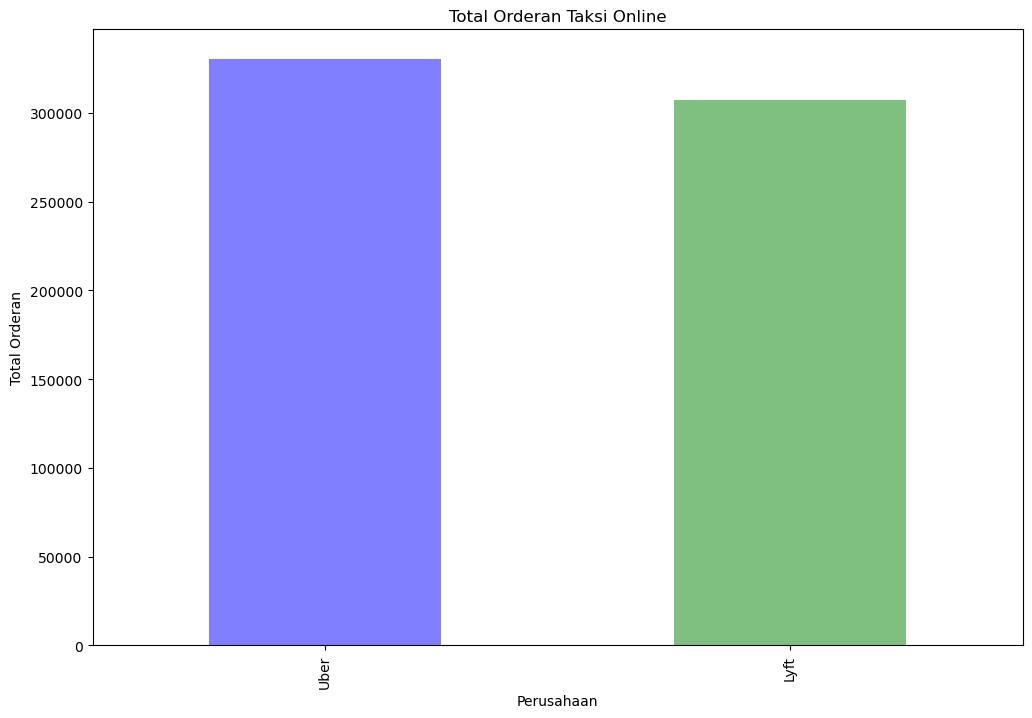

In [47]:
#Memvisualisasikan dalam bentuk bar charts
df_company.plot(kind='bar', 
                figsize=(12,8), 
                color=['blue','green'], 
                alpha=0.5)

plt.xlabel('Perusahaan')
plt.ylabel('Total Orderan')
plt.title('Total Orderan Taksi Online')

plt.show()

**Kesimpulan:**
Dari visualisasi diatas dapat disimpulkan bahwa masyarakat banyak memesan Uber daripada Lyft.

### Data Exploration untuk type_car

#### Membuat Variable untuk melihat total data pada Uber dan Lyft

In [50]:
## Melihat tipe yang ditawarkan oleh Uber
df_car_type_uber = pd.DataFrame(df_new1[(df_new1['company']=='Uber')].groupby(['car_type'])['car_type'].count())
df_car_type_uber

,car_type
car_type,
Black,55095
Black SUV,55096
UberPool,55091
UberX,55094
UberXL,55096
WAV,55096


In [56]:
## Melihat tipe yang ditawarkan oleh Uber
df_car_type_uber = pd.DataFrame(df_new1[(df_new1['company']=='Lyft')].groupby(['car_type'])['car_type'].count())
df_car_type_uber

,car_type
car_type,
Lux,51235
Lux Black,51235
Lux Black XL,51235
Lyft,51235
Lyft XL,51235
Shared,51233


In [52]:
## Mengubah menjadi numerik
df_car_type_uber_numeric = pd.DataFrame(df_new1.groupby(["company"])["car_type"].value_counts())
df_car_type_uber_numeric

car_type
company car_type              
Lyft    Lux              51235
        Lux Black        51235
        Lux Black XL     51235
        Lyft             51235
        Lyft XL          51235
        Shared           51233
Uber    Black SUV        55096
        UberXL           55096
        WAV              55096
        Black            55095
        UberX            55094
        UberPool         55091

#### Membuat Visualisasi car_type

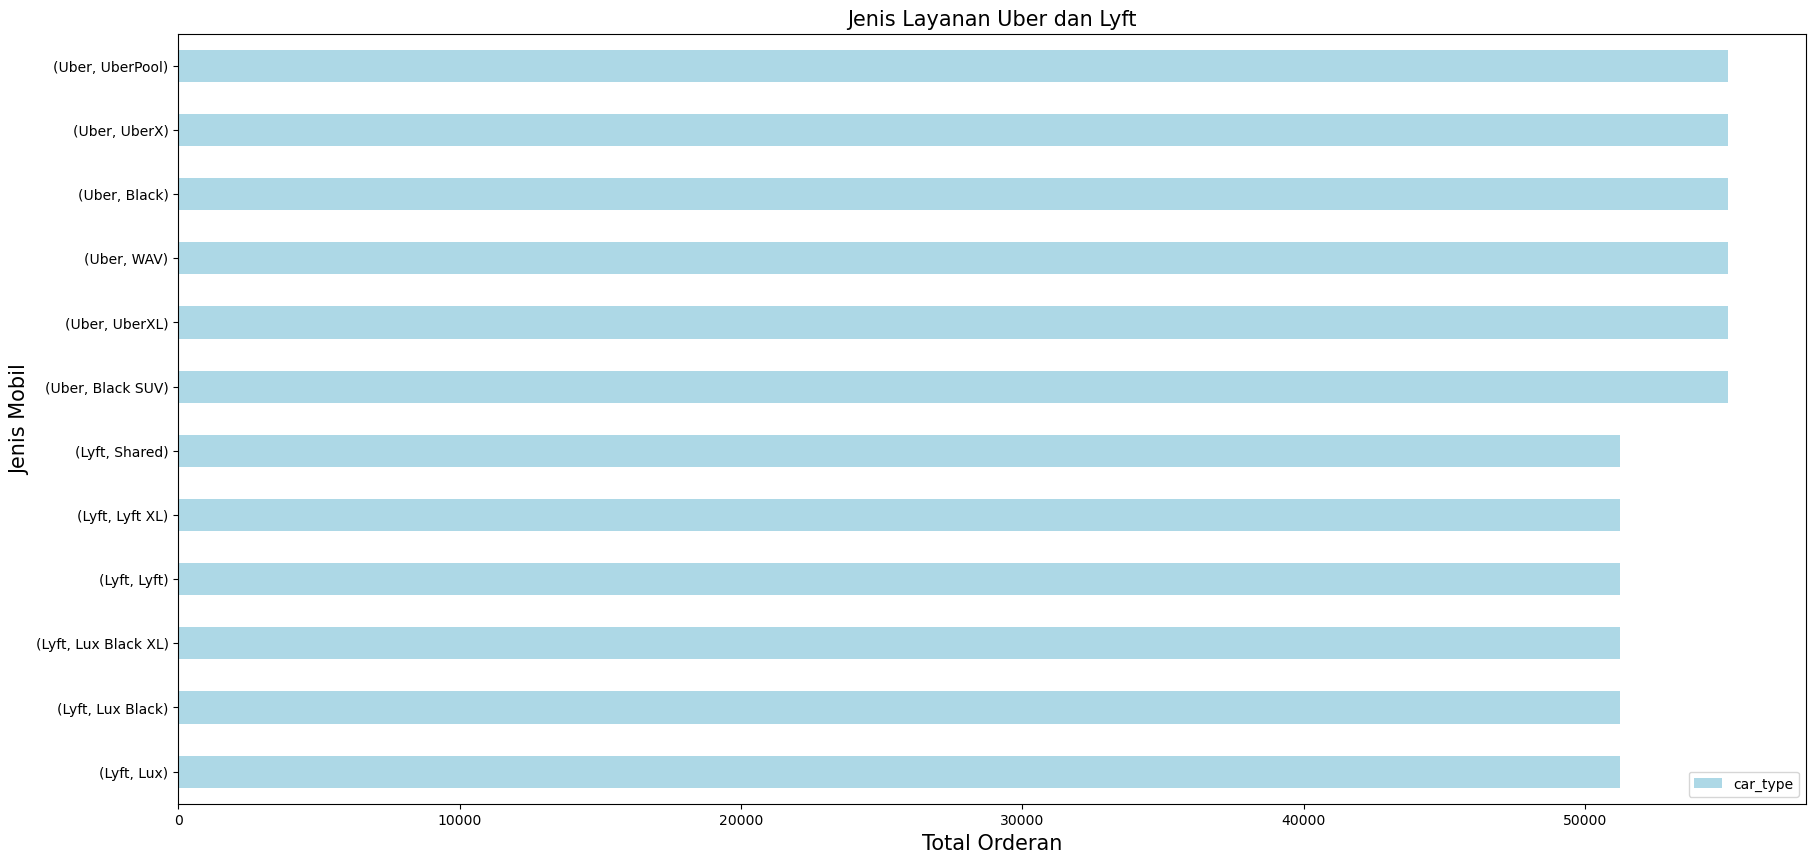

In [54]:
## Memvisualiasikan berdasarkan total kind
df_car_type_uber_numeric.plot(
                    kind="barh", 
                    figsize=(21,10), 
                    color='lightblue')

plt.title("Jenis Layanan Uber dan Lyft", fontsize=15)
plt.ylabel("Jenis Mobil", fontsize=15)
plt.xlabel("Total Orderan", fontsize=15)

plt.show()

**Kesimpulan:**

Dari visualisasi diatas dapat dilihat Uber paling banyak dipesan oleh masyrakat daripada Lyft, namun dengan distribusi yang signifikan pada keduanya.

### Data Exploration untuk weather_condition

#### Membuat Variable untuk melihat total data pada weather_condition

In [55]:
## Melihat nilai unique Weather
df_new1['weather_condotion'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [57]:
# Membuat dataframe yang berisi jumlah data penumpang berdasarkan cuaca
df_weather=pd.DataFrame(df_new1.groupby(
                        ['weather_condotion'])
                        ['weather_condotion'].value_counts())

df_weather=df_weather.rename(columns={
                        'weather_condotion':'value'})

df_weather.reset_index(
                drop=True, 
                inplace=True)

df_weather['weather_condotion']=[
                    'clear',
                    'Drizzle',
                    'Foggy',
                    'Light Rain',
                    'Mostly Cloudy',
                    'Overcast',
                    'Partly Cloudy',
                    'Possible Drizzle',
                    'Rain']

df_weather=df_weather.set_index('weather_condotion')
df_weather

,value
weather_condotion,
clear,80256
Drizzle,6725
Foggy,8292
Light Rain,50488
Mostly Cloudy,134603
Overcast,201429
Partly Cloudy,117226
Possible Drizzle,17176
Rain,21781


In [61]:
## Menyiapkan untuk ploting pie chart
df_weather1=pd.DataFrame(df_new1.groupby(['weather_condotion','company']).max()['price'].sort_values())
df_weather1=df_weather_max.rename(columns={'transport_name':'value'})
df_weather1

,,price
weather_condotion,company,
Foggy,Uber,50.5
Drizzle,Uber,58.5
Light Rain,Uber,59.5
Foggy,Lyft,62.5
Rain,Uber,64.0
Possible Drizzle,Uber,64.5
Clear,Uber,68.5
Possible Drizzle,Lyft,75.0
Drizzle,Lyft,80.0


#### Membuat Visualisasi weather

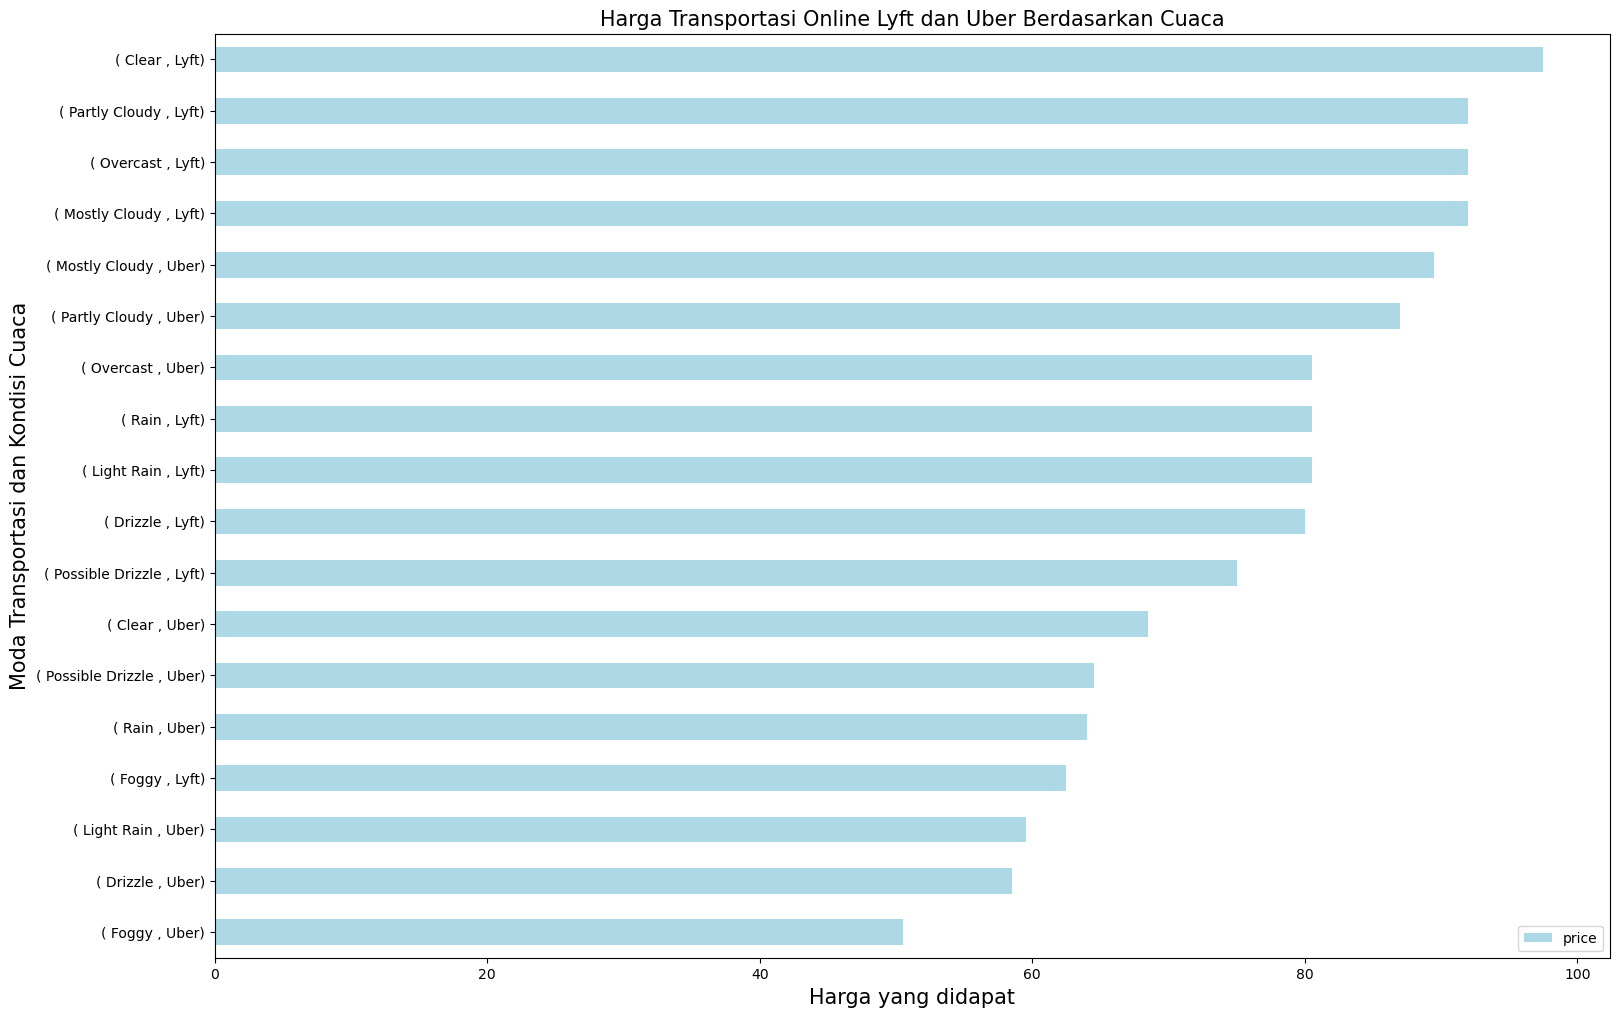

In [63]:
#Memvisualisasikan kolom weather_condotion dengan company dalam bar
df_weather_max.plot(
                kind="barh", 
                figsize=(18,12), 
                color='lightblue')

plt.title("Harga Transportasi Online Lyft dan Uber Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Moda Transportasi dan Kondisi Cuaca", fontsize=15)
plt.xlabel("Harga yang didapat", fontsize=15)

plt.show()

**Kesimpulan:**

Dari visual di atas, dapat diketahui ketika cuaca sedang cerah, Uber memasang  harga lebih muah daripada lyft.

### Data Exploration berdasarakan month selama satu tahun

#### Membuat Variable untuk melihat total data pada atribut month

In [65]:
months = df_new1['month'].value_counts()
df_months = pd.DataFrame(data=months.index, columns=["month"])
df_months['values'] = months.values

df_months

,month,values
0,12,374205
1,11,263771


#### Membuat Visualisasi Months

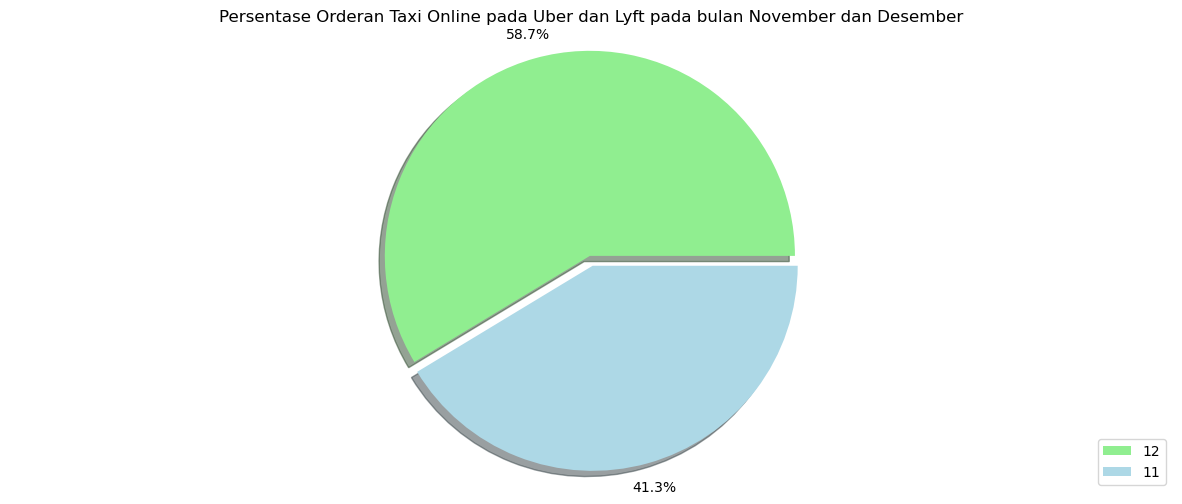

In [72]:
#Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0]

color_list=['lightgreen','lightblue']

months.plot(
    kind="pie", 
    figsize=(15,6), 
    shadow=True, 
    autopct="%1.1f%%", 
    labels=None, 
    colors=color_list, 
    explode=explode_list, 
    pctdistance=1.12)

plt.title('Persentase Orderan Taxi Online pada Uber dan Lyft pada bulan November dan Desember')
plt.ylabel('')
plt.axis('equal')
plt.legend(months.index, loc='lower right')

plt.show()

**Kesimpulan:**

Berdasarkan hasil di atas, dapat disimpulkan bahwa dalam dataset ini hanya mencakup dua bulan, yaitu November dan Desember. Artinya, data hanya tersedia untuk kedua bulan tersebut. Dalam bulan November, pemesanan mencapai 41,3%, sedangkan bulan Desember mendominasi dengan 58,7% pemesanan penumpang. Dominasi pemesanan ini terjadi karena bulan Desember terdapat 2 event yang besar yaitu libur natal dan tahun baru.

#### Correlation Matrix

C:\Users\danup\AppData\Local\Temp\ipykernel_576\307777363.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new1.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")


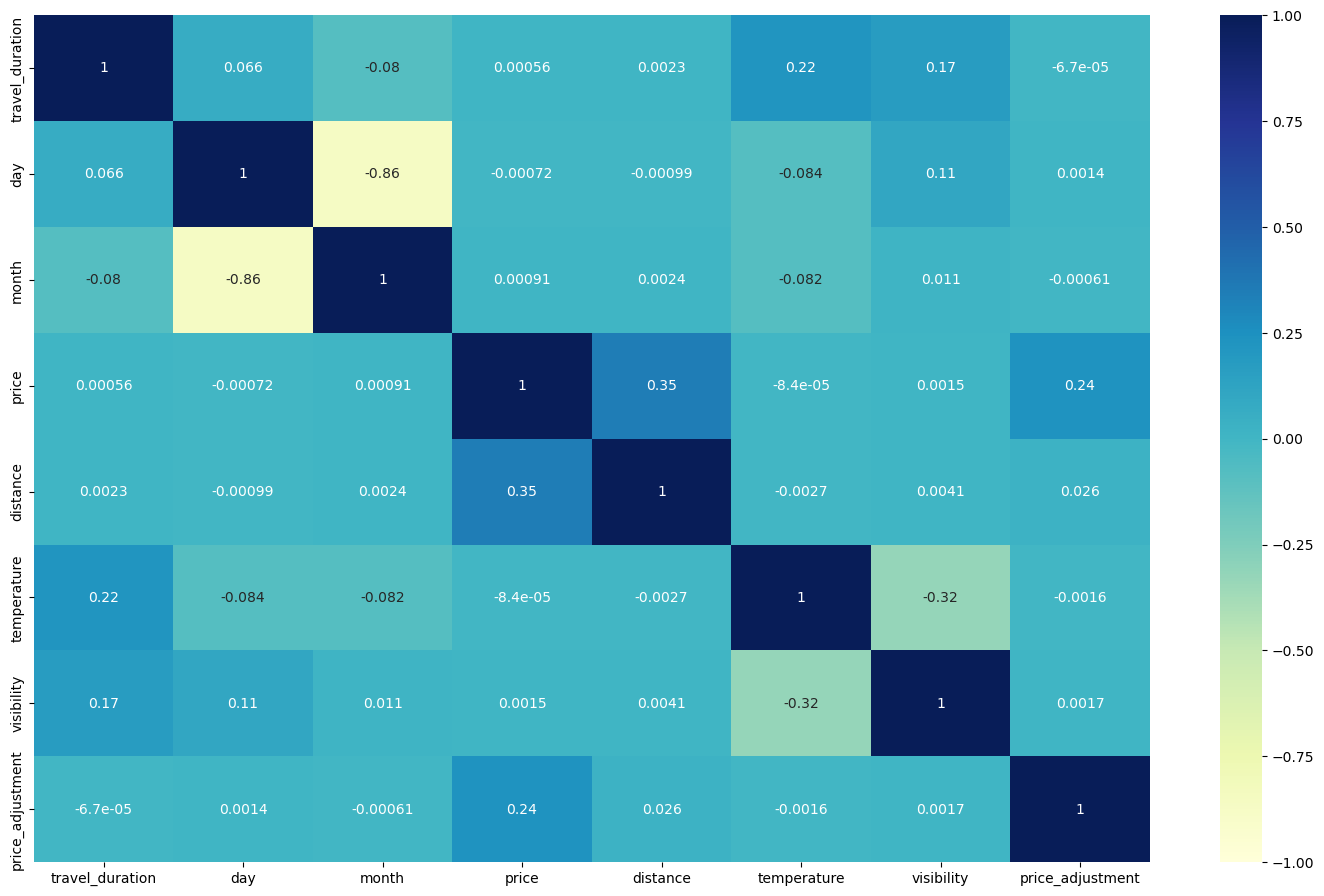

In [100]:
#Melihat korelasi antardata menggunakan heatmap
plt.figure(figsize=(18, 11))
sns.heatmap(df_new1.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

plt.show()

dari hasil matrix diatas diketahui day dan temperature bernilai negatif pada harga yang mana harga menjadi artribut penting saat kita ingin melakukan pemodelan. sehingga Day dan Temperatur akan kita hapuskan karena tidak memiliki korelasi.

In [106]:
df_new2=df_new1.drop(['day','temperature'], axis=1)
df_new2.head(5)

,company,car_type,travel_duration,month,origin,arrival,price,distance,weather_condotion,visibility,price_adjustment,route
0,Lyft,Shared,9,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,10.000,1.0,Haymarket Square to North Station
1,Lyft,Lux,2,11,Haymarket Square,North Station,11.0,0.44,Rain,4.786,1.0,Haymarket Square to North Station
2,Lyft,Lyft,1,11,Haymarket Square,North Station,7.0,0.44,Clear,10.000,1.0,Haymarket Square to North Station
3,Lyft,Lux Black XL,4,11,Haymarket Square,North Station,26.0,0.44,Clear,10.000,1.0,Haymarket Square to North Station
4,Lyft,Lyft XL,3,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,10.000,1.0,Haymarket Square to North Station


C:\Users\danup\AppData\Local\Temp\ipykernel_576\384525764.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new2.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")


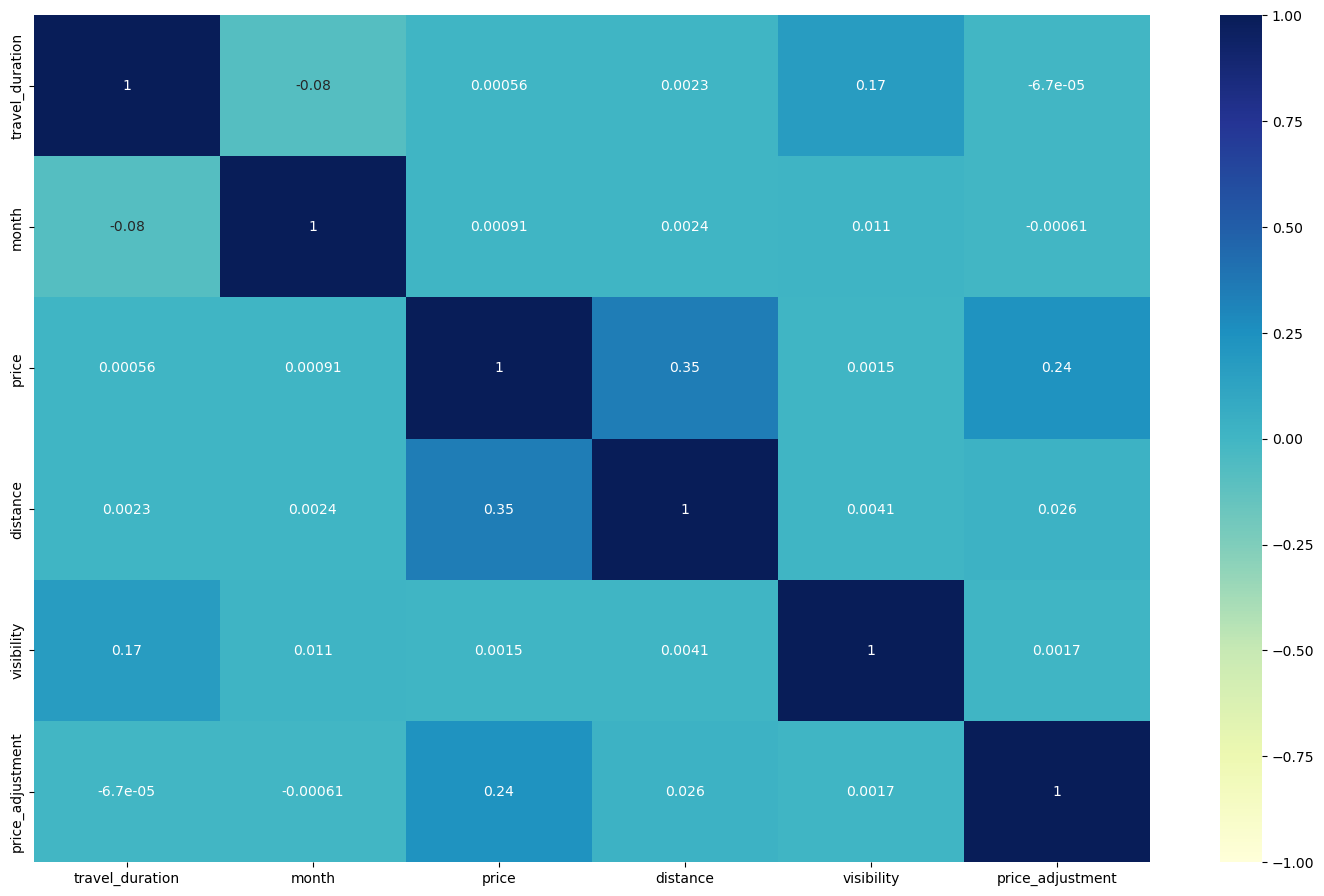

In [102]:
plt.figure(figsize=(18, 11))
sns.heatmap(df_new2.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

plt.show()

## Data Preprocessing

### Tahapan Encoding

In [108]:
# Daftar kolom yang ingin diencode
columns_to_encode = ["company",
                     "car_type",
                     "travel_duration",
                     "month",
                     "origin", 
                     "arrival",
                     "price", 
                     "distance",
                     "weather_condotion",
                     "visibility",
                     "price_adjustment",
                     "route"]

# Melakukan encoding untuk setiap kolom yang terdapat dalam columns_to_encode
for col in columns_to_encode:
    le = LabelEncoder()
    df_new2[col] = le.fit_transform(df_new2[col])

In [109]:
df_new2.head(10)

,company,car_type,travel_duration,month,origin,arrival,price,distance,weather_condotion,visibility,price_adjustment,route
0,0,7,9,1,5,7,4,15,4,226,0,33
1,0,2,2,0,5,7,20,15,8,57,0,33
2,0,5,1,0,5,7,8,15,0,226,0,33
3,0,4,4,0,5,7,53,15,0,226,0,33
4,0,6,3,0,5,7,14,15,6,226,0,33
5,0,3,18,1,5,7,32,15,5,84,0,33
6,0,6,5,0,0,8,18,79,5,53,0,4
7,0,3,19,1,0,8,32,79,3,25,0,4
8,0,7,6,1,0,8,1,79,2,3,0,4
9,0,4,10,0,0,8,56,79,3,19,0,4


In [110]:
# Memisahkan atribut dan target
X_trans = df_new2.drop(["price"], axis=1)  # "price" adalah target
print(X_trans.shape)

(637976, 11)


In [114]:
Y = df_new2['price']
print(Y.shape)

(637976,)


### Sequential Feature Selection

Selanjutnya melakukan Sequential Feature Selection untuk menentukan atribut paling berpengaruh

In [124]:
sfs = SequentialFeatureSelector(LinearRegression(),
                                k_features=10, 
                                forward=True, 
                                floating=False, 
                                verbose=2, 
                                cv=0)
sfs = sfs.fit(X_trans, Y)

selected_feature_names = sfs.k_feature_names_
print(selected_feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2023-10-26 13:14:43] Features: 1/10 -- score: 0.3527177638931067[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished

[2023-10-26 13:14:44] Features: 2/10 -- score: 0.4761146764527159[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2023-10-26 13:14:45] Features: 3/10 -- score: 0.508860994811617[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

('company', 'car_type', 'travel_duration', 'origin', 'arrival', 'distance', 'weather_condotion', 'visibility', 'price_adjustment', 'route')


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2023-10-26 13:14:50] Features: 10/10 -- score: 0.5237808949225853

In [128]:
# Membuat variabel x_transform untuk menampung hasil data yang menghapus kolom price dan rate
x_transform = df_new2.drop(['price'], axis=1)

# Menggunakan SelectKBest dengan skor f_regression untuk memilih 10 atribut terbaik
best_features = SelectKBest(score_func=f_regression, k=10)
best_features.fit(x_transform, Y)

# Mendapatkan nilai skor untuk setiap atribut
feature_scores = best_features.scores_

# Mendapatkan nama atribut
feature_names = x_transform.columns

# Membuat DataFrame untuk atribut dan skornya
feature_scores_df = pd.DataFrame({'Atribut': feature_names, 'Nilai': feature_scores})

# Mengurutkan DataFrame berdasarkan skor tertinggi
sorted_features = feature_scores_df.nlargest(10, 'Nilai')

print(sorted_features)

              Atribut          Nilai
1            car_type  347645.509408
6            distance   90197.144022
9    price_adjustment   36103.646157
0             company    4369.203636
5             arrival    1448.090464
10              route     589.703583
4              origin     413.207521
7   weather_condotion       1.077943
8          visibility       0.731585
3               month       0.438577


Atribut yang memilii nilai terendah adalah visibiliy dan month, maka dari 2 atribut itu akan kita hapus.

Selanjutnya membuat dataset yang tidak memiliki kedua atribut tadi

In [129]:
X_final = df_new2[['company',
                   'car_type',
                   'origin',
                   'arrival', 
                   'route',
                   'weather_condotion',
                   'distance',
                   'price_adjustment']]

X_final

,company,car_type,origin,arrival,route,weather_condotion,distance,price_adjustment
0,0,7,5,7,33,4,15,0
1,0,2,5,7,33,8,15,0
2,0,5,5,7,33,0,15,0
3,0,4,5,7,33,0,15,0
4,0,6,5,7,33,6,15,0
...,...,...,...,...,...,...,...,...
693065,1,11,11,6,69,6,71,0
693066,1,10,11,6,69,6,71,0
693067,1,9,11,6,69,6,71,0
693069,1,1,11,6,69,6,71,0


## Pemodelan

### Latar belakang pemodelan

Dalam proyek ini, kami akan menggunakan metode **Linear Regression** sebagai model dasar, dan kami akan membandingkannya dengan **Decision Tree**. Linear Regression dikenal sebagai metode regresi yang simpel dan terkenal dalam statistik. Keunggulan utamanya terletak pada kemampuannya untuk memberikan hasil yang mudah diinterpretasikan dan mempermudah pemahaman tentang bagaimana variabel independen berhubungan dengan variabel dependen. Ini sangat berguna ketika ingin mengevaluasi sejauh mana hubungan linier antara variabel yang diprediksi dan variabel respons.

Linear Regression memiliki keterbatasan, terutama dalam menangani hubungan yang rumit atau non-linier antara variabel. Oleh karena itu, kami akan membandingkannya dengan Decision Tree, yang merupakan model non-linier dan mampu mengatasi hubungan yang lebih kompleks antara variabel. Decision Tree adalah pilihan yang tepat saat menghadapi data yang tidak mematuhi asumsi linieritas.

Dengan membandingkan Linear Regression dan Decision Tree, kami akan mengevaluasi sejauh mana kinerja keduanya. Dengan demikian, pemilihan metode pengujian ini akan memberikan wawasan yang lebih mendalam dalam memahami karakteristik data yang sedang dianalisis.

### Membuat Pemodelan

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.20, random_state=450)

#### Model Linear Regression

In [137]:
model_lr = LinearRegression()

In [138]:
# Melatih model dengan data latih
model_lr1 = model_lr.fit(X_train, Y_train)

# Melihat nilai intercept
intercept = model_lr1.intercept_
print(f'Intercept: {intercept}')

Intercept: 35.53204044057236


In [139]:
# Melihat nilai koefisien
coefficients = model_lr1.coef_
print('Coefficients:', coefficients)

Coefficients: [ 5.38915069e+00 -3.71928758e+00  9.95736610e-01  1.11656823e-01
 -1.54731682e-01  4.03500445e-03  6.61230815e-02  1.12510478e+01]


In [167]:
# Melakukan prediksi
predictions_lr = model_lr1.predict(X_test)

# Menghitung R-squared (R2) pada data latih dan data uji
train_r2_lr = r2_score(Y_train, model_lr1.predict(X_train))
test_r2_lr = r2_score(Y_test, predictions_lr)

print(f'Linear Regression train R squared: {train_r2_lr:.4f}')
print(f'Linear Regression test R squared: {test_r2_lr:.4f}')

Linear Regression train R squared: 0.5245
Linear Regression test R squared: 0.5207


In [186]:
# Menghitung Mean Absolute Error (MAE) pada data uji
test_mae_lr = mean_absolute_error(Y_test, predictions_lr)

print(f'Linear Regression test MAE: {test_mae_lr:.4f}')

Linear Regression test MAE: 11.7496


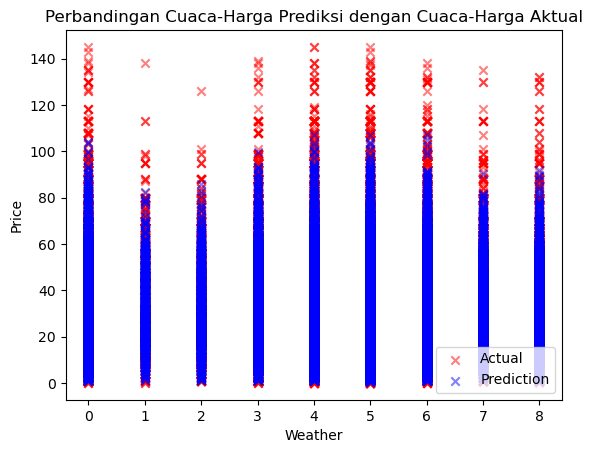

In [159]:
# Memvisualisasikan perbandingan weather_condotion terhadap price
x_axis = X_test.weather_condotion

plt.scatter(x_axis, 
            Y_test, 
            c='r', 
            alpha=0.5, 
            marker='x', 
            label='Actual')

plt.scatter(x_axis, 
            predictions_lr, 
            c='b', 
            alpha=0.5, 
            marker='x', 
            label='Prediction')

plt.xlabel('Weather')
plt.ylabel('Price') 
plt.title("Perbandingan Cuaca-Harga Prediksi dengan Cuaca-Harga Aktual")
plt.legend(loc='lower right')

plt.show()

#### Model Decision Tree

In [183]:
model_dt = DecisionTreeRegressor()

In [185]:
# Melatih model dengan data latih
model_dt1 = model_dt.fit(X_train, Y_train)

# Melakukan prediksi
predictions_dt = model_dt1.predict(X_test)

# Menghitung R-squared (R2) pada data latih dan data uji
train_r2_dt = r2_score(Y_train, model_dt1.predict(X_train))
test_r2_dt = r2_score(Y_test, predictions_dt)

print(f'Decision Tree Regression train R squared: {train_r2_dt:.4f}')
print(f'Decision Tree Regression test R squared: {test_r2_dt:.4f}')

Decision Tree Regression train R squared: 0.9762
Decision Tree Regression test R squared: 0.9633


In [187]:
# Menghitung Mean Absolute Error (MAE) pada data uji
test_mae_dt = mean_absolute_error(Y_test, predictions_dt)

print(f'Linear Regression test MAE: {test_mae:.4f}')

Linear Regression test MAE: 2.5071


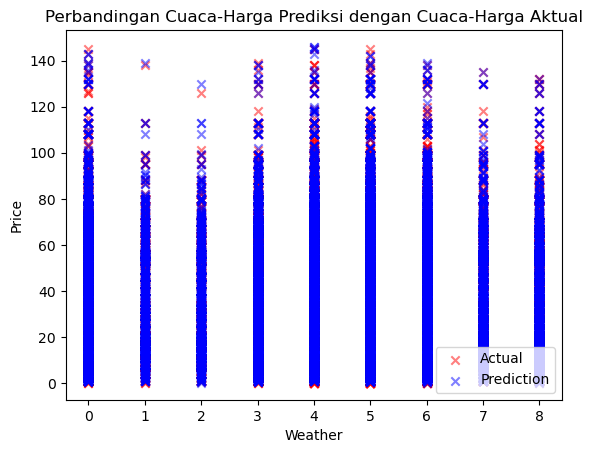

In [158]:
# Memvisualisasikan perbandingan weather_condotion terhadap price
x_axis = X_test.weather_condotion

plt.scatter(x_axis, 
            Y_test, 
            c='r', 
            alpha=0.5, 
            marker='x', 
            label='Actual')

plt.scatter(x_axis, 
            predictions_dt, 
            c='b', 
            alpha=0.5, 
            marker='x', 
            label='Prediction')

plt.xlabel('Weather')
plt.ylabel('Price') 
plt.title("Perbandingan Cuaca-Harga Prediksi dengan Cuaca-Harga Aktual")
plt.legend(loc='lower right')

plt.show()

## Kesimpulan

In [188]:
print(f'Linear Regression test R squared: {test_r2_lr:.4f}')
print(f'Decision Tree Regression test R squared: {test_r2_dt:.4f}')

Linear Regression test R squared: 0.5207
Decision Tree Regression test R squared: 0.9633


**Kesimpulan:**

Berdasarkan metode di atas didapati kesimpulan bahwa pada kedua metode ini adalah:

**Linear Regression Model:**

Model Linear Regression memiliki R-squared (R2) sebesar 0.5245 pada data latih dan 0.5207 pada data uji. Ini mengindikasikan bahwa sekitar 52.45% dari variabilitas dalam target (harga) dapat dijelaskan oleh atribut-atribut yang digunakan dalam model pada data latih, sedangkan pada data uji, sekitar 52.07% variabilitas dapat dijelaskan.

**Decision Tree Regression Model**
Hasil R2 pada pemodelan Decision Tree Regression sangat tinggi, terutama pada data latih dengan nilai 0.9762, yang mengindikasikan bahwa model Decision Tree dapat menjelaskan sekitar 97.62% variabilitas dalam harga pada data latih. Hal ini menunjukkan kinerja yang sangat baik dalam pemahaman hubungan antara atribut dan target pada data latih. Namun, ada sedikit penurunan performa pada data uji dengan R2 sekitar 0.9633. Meskipun begitu, R2 yang tinggi pada data uji menunjukkan bahwa model ini secara umum mampu menjelaskan hubungan antara atribut dan target.